
## YOLOv11 Object Detection on Safety Helmets



In [ ]:
# Install libraries ultralytics and roboflow
%pip install ultralytics roboflow  



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

## Import and Set up

In [ ]:
#Import libraries
import os
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image
import glob


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [3]:
#Set up home directory
HOME = os.getcwd()
print(HOME)

/content


## Download Dataset

In [ ]:
#Use Roboflow API to download dataset
#!mkdir {HOME}/datasets
#%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY") 
project = rf.workspace("joseph-nelson").project("hard-hat-workers")
dataset = project.version(14).download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Workers-14 in yolov11:: 100%|██████████| 14082/14082 [00:02<00:00, 4839.48it/s]


## Training

In [6]:
#%cd {HOME}
# Load model
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Train model
results = model.train(data=f'{HOME}/Hard-Hat-Workers-14/data.yaml', epochs=10, imgsz=640, plots=True, seed=1)

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Hard-Hat-Workers-14/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 36.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Hard-Hat-Workers-14/train/labels... 4916 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4916/4916 [00:02<00:00, 1661.02it/s]


train: New cache created: /content/Hard-Hat-Workers-14/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Hard-Hat-Workers-14/valid/labels... 1413 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1413/1413 [00:01<00:00, 857.65it/s]


val: New cache created: /content/Hard-Hat-Workers-14/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.33G       1.38      1.469      1.122         15        640: 100%|██████████| 308/308 [01:42<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]


                   all       1413       5252      0.911      0.879      0.936      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.09G      1.328      0.879       1.12         20        640: 100%|██████████| 308/308 [01:37<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.49it/s]


                   all       1413       5252      0.911      0.845      0.921      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.12G      1.305     0.7768       1.12         25        640: 100%|██████████| 308/308 [01:35<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.01it/s]

                   all       1413       5252      0.932      0.871      0.944      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.12G      1.274     0.7184       1.11         21        640: 100%|██████████| 308/308 [01:35<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:12<00:00,  3.63it/s]

                   all       1413       5252      0.934      0.891      0.952      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.14G      1.244     0.6715      1.097         11        640: 100%|██████████| 308/308 [01:36<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.19it/s]

                   all       1413       5252      0.937      0.896      0.957      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.15G       1.23     0.6346      1.087          9        640: 100%|██████████| 308/308 [01:37<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.30it/s]

                   all       1413       5252      0.941      0.908       0.96      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.17G      1.198     0.6033      1.078         13        640: 100%|██████████| 308/308 [01:36<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.20it/s]


                   all       1413       5252      0.944      0.915      0.967      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.18G      1.174     0.5742       1.06         13        640: 100%|██████████| 308/308 [01:36<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.00it/s]

                   all       1413       5252      0.952      0.911      0.969      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.19G      1.153     0.5463       1.05         14        640: 100%|██████████| 308/308 [01:35<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.84it/s]

                   all       1413       5252      0.948      0.932      0.974      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.21G      1.134     0.5247       1.04         15        640: 100%|██████████| 308/308 [01:35<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  3.99it/s]

                   all       1413       5252      0.953      0.929      0.974      0.666



10 epochs completed in 0.305 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.4MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:14<00:00,  3.06it/s]


                   all       1413       5252      0.953      0.929      0.974      0.666
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


## Results

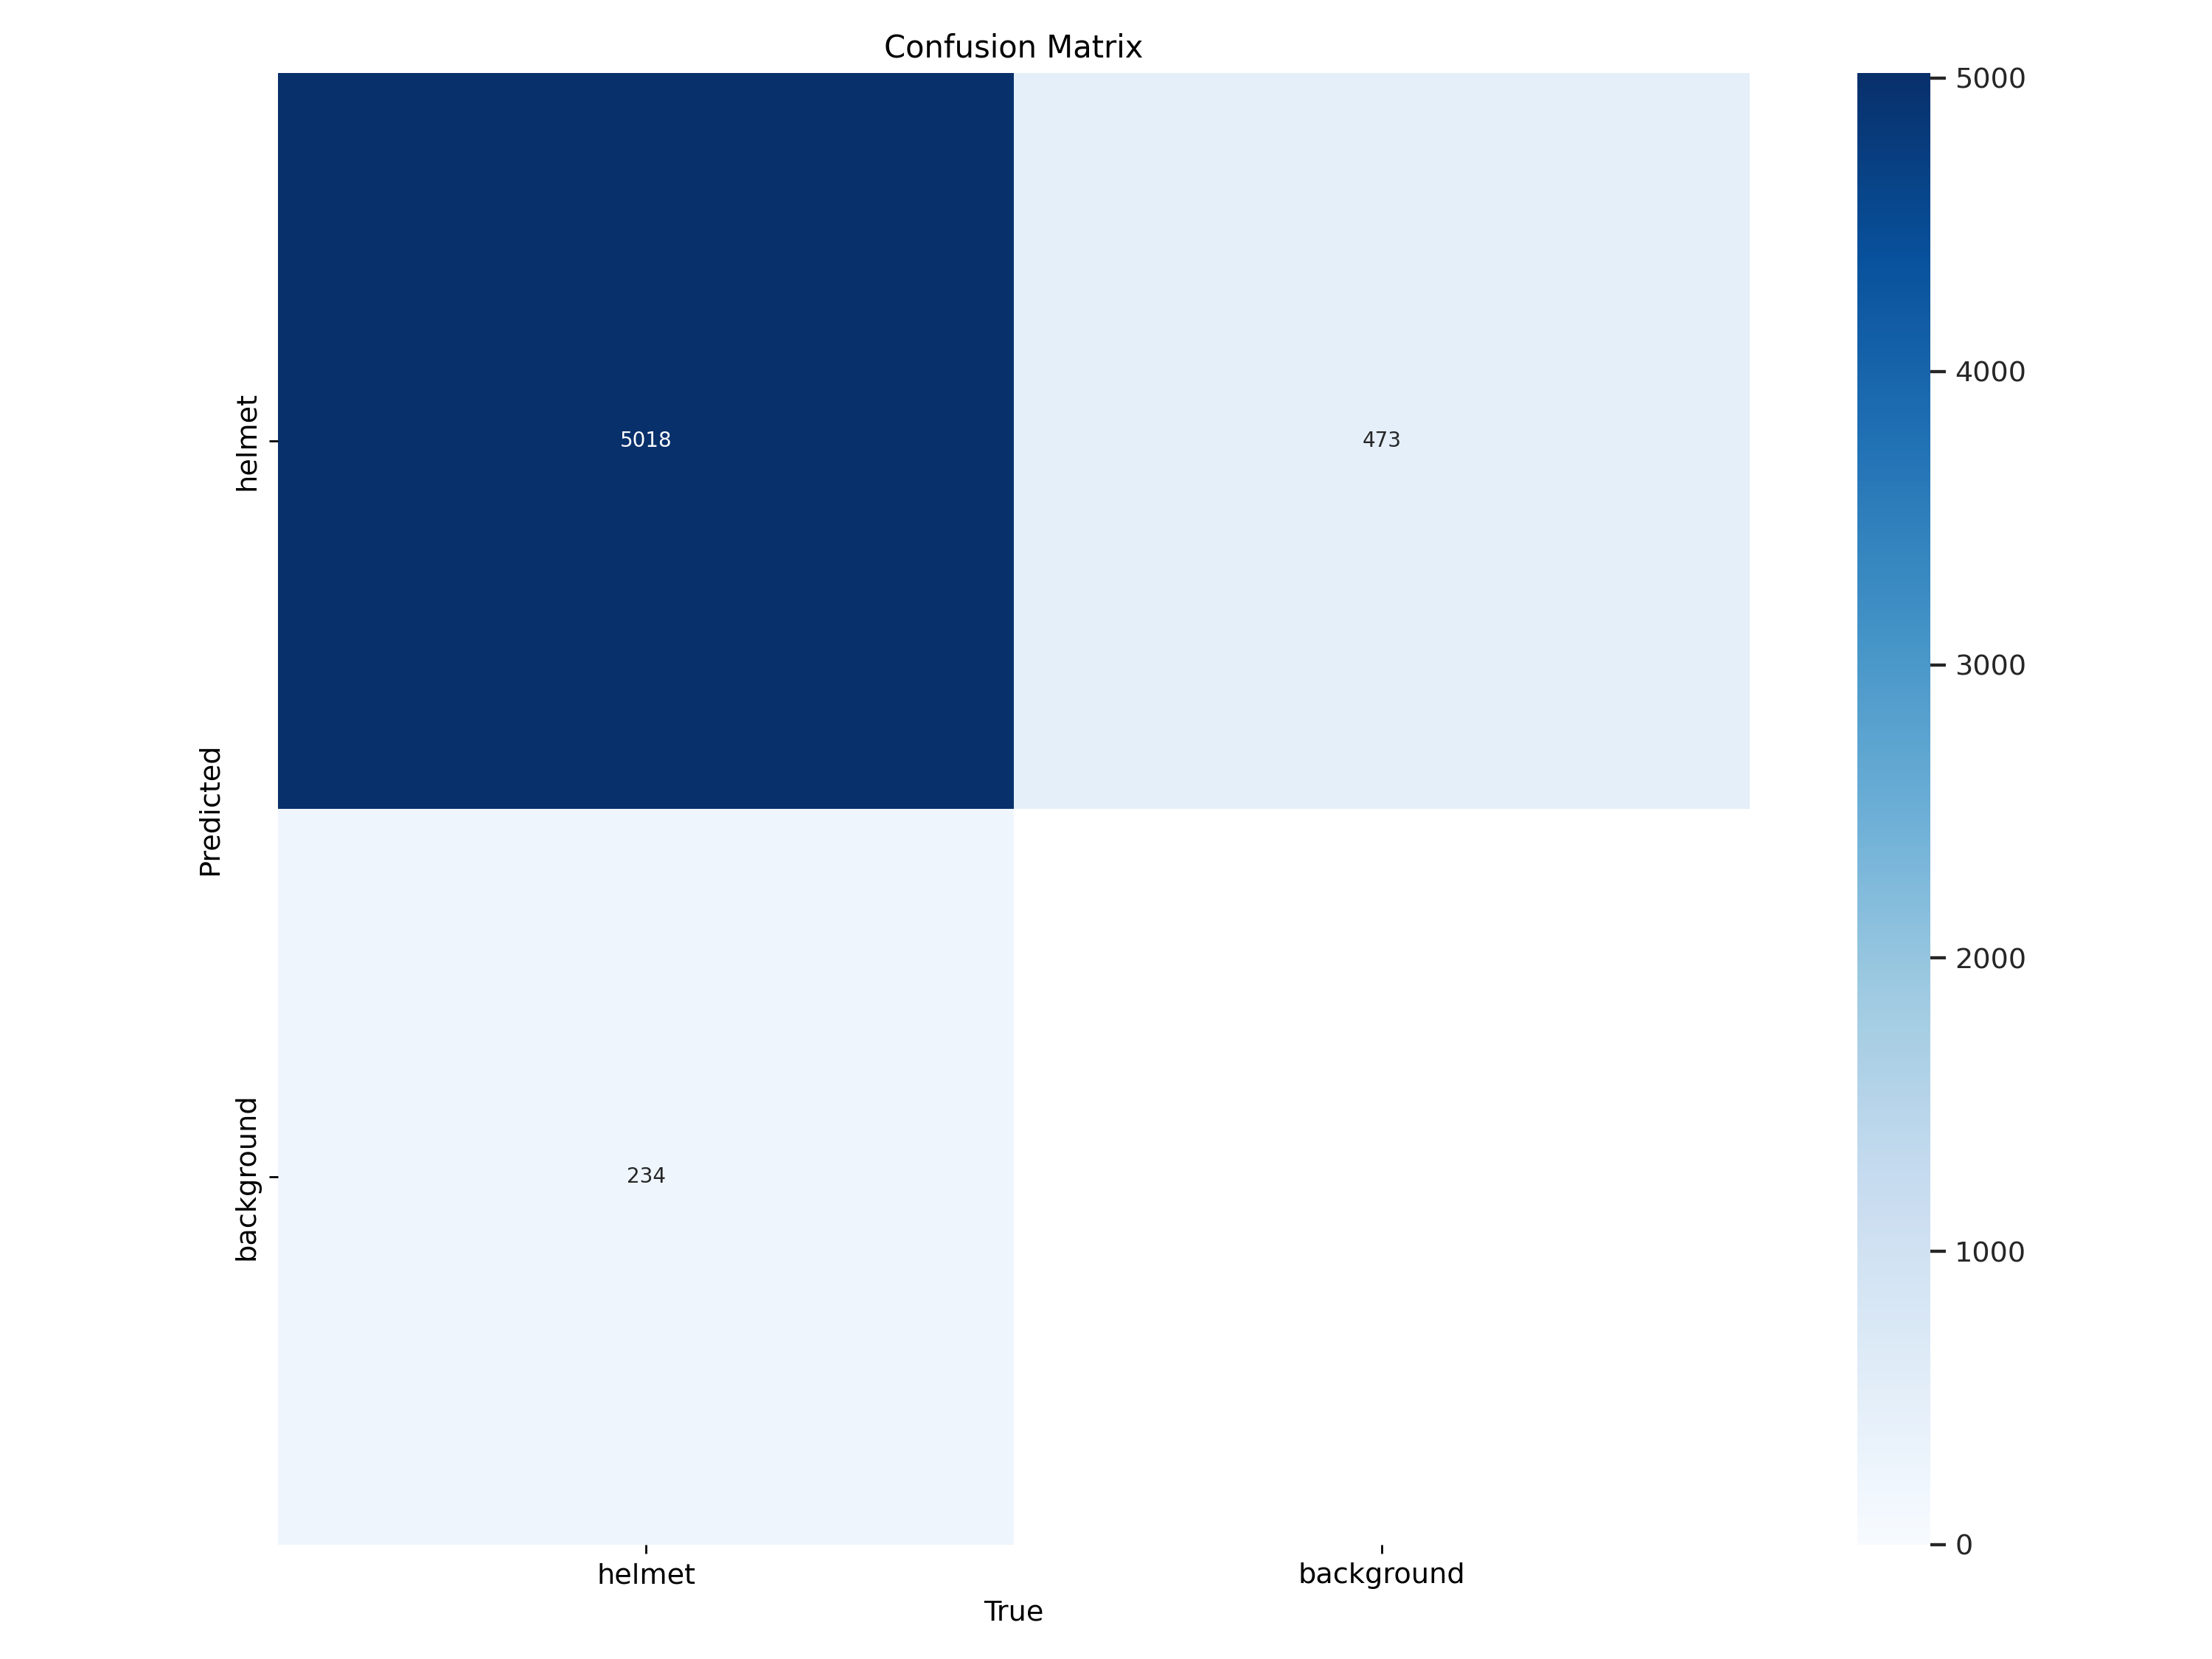

In [7]:

Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

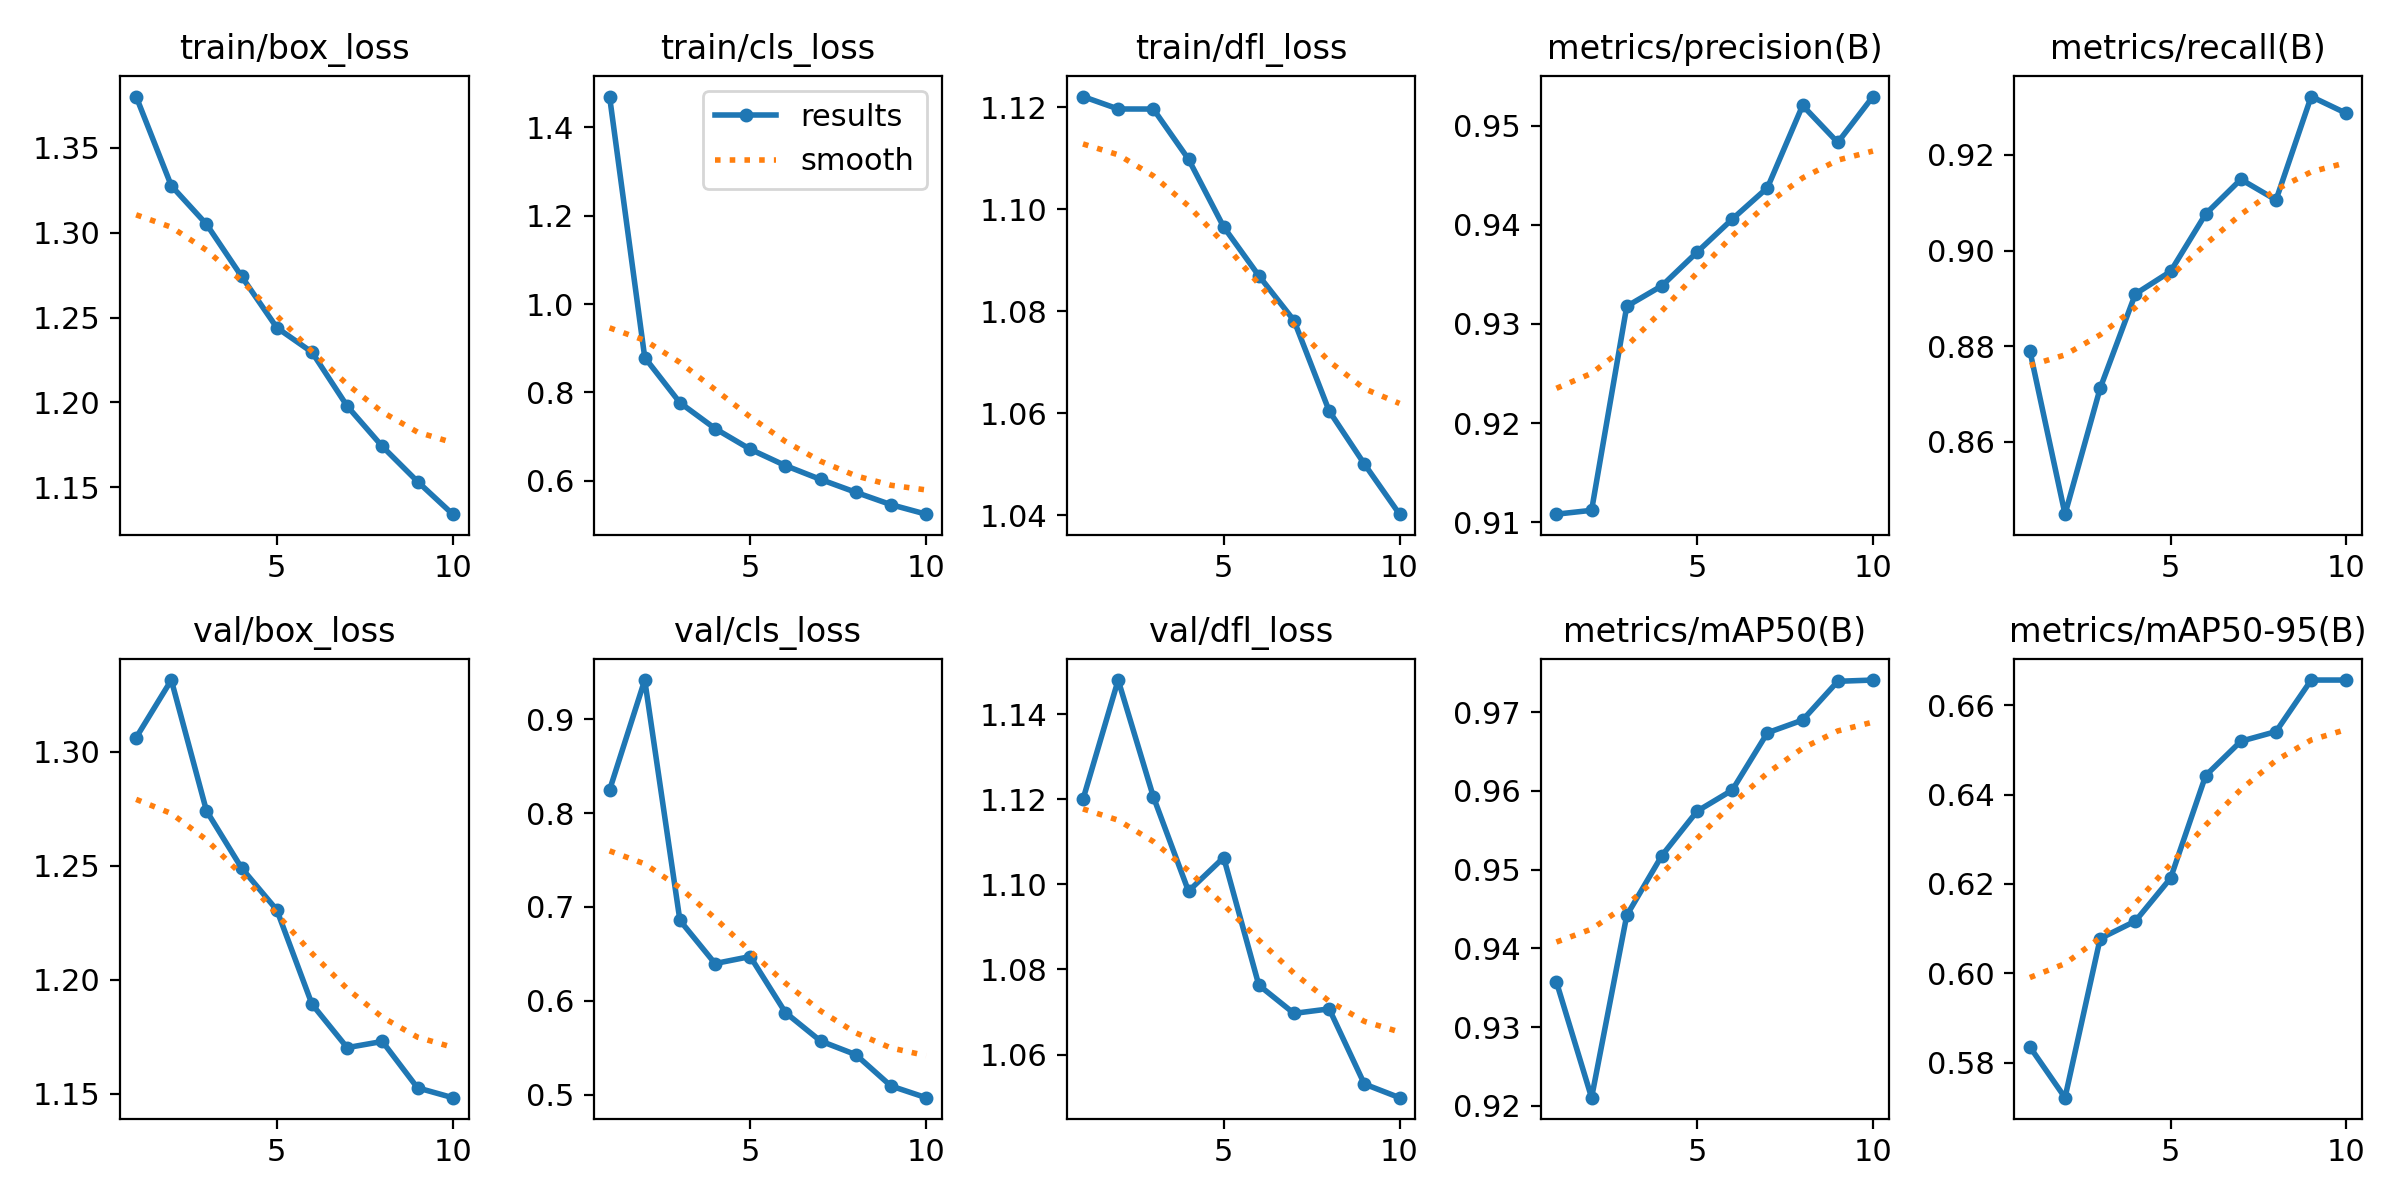

In [8]:

Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

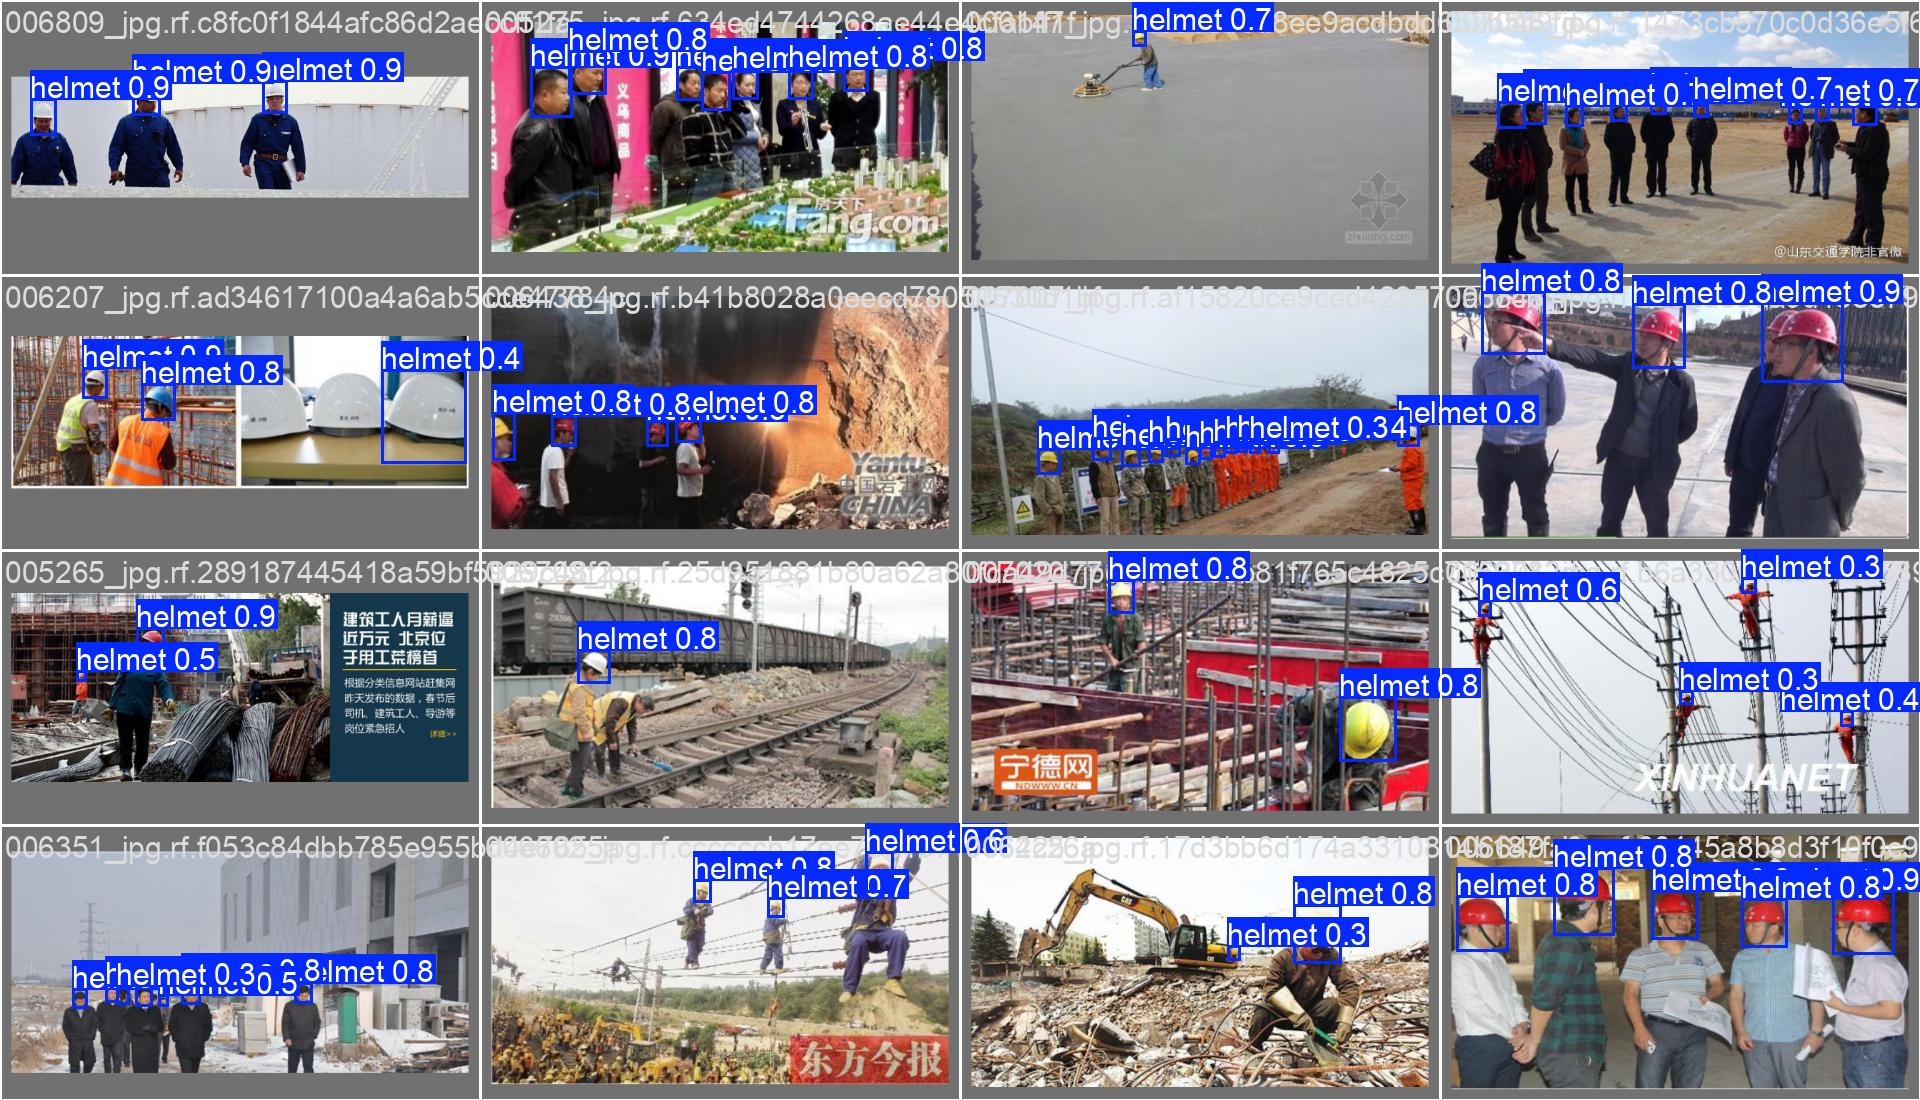

In [9]:

Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
# Load model
model = YOLO(f'{HOME}/runs/detect/train2/weights/best.pt')

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Hard-Hat-Workers-14/valid/labels.cache... 1413 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1413/1413 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:15<00:00,  5.66it/s]


                   all       1413       5252      0.953      0.929      0.974      0.666
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val2


array([    0.66556])

## Inference with Custom Model

In [11]:
test= f'{HOME}/Hard-Hat-Workers-14/test/images/'
model.predict(test, save=True, imgsz=640, conf=0.25)



image 1/706 /content/Hard-Hat-Workers-14/test/images/005298_jpg.rf.d6fe5e5635be9509610a059a66e432d5.jpg: 448x640 8 helmets, 58.3ms
image 2/706 /content/Hard-Hat-Workers-14/test/images/005299_jpg.rf.fb7c522d8fc48969a295a287032b53c1.jpg: 448x640 1 helmet, 12.7ms
image 3/706 /content/Hard-Hat-Workers-14/test/images/005300_jpg.rf.75d17868202e675bdb300b60b8cb2722.jpg: 480x640 2 helmets, 54.5ms
image 4/706 /content/Hard-Hat-Workers-14/test/images/005301_jpg.rf.e9c1d355a0bb57e4e8d81a36a39042c8.jpg: 480x640 5 helmets, 10.1ms
image 5/706 /content/Hard-Hat-Workers-14/test/images/005302_jpg.rf.276a11259090a88e935e5982c991757b.jpg: 640x512 1 helmet, 53.2ms
image 6/706 /content/Hard-Hat-Workers-14/test/images/005303_jpg.rf.cce32679b8fede85699505a2f2624366.jpg: 480x640 5 helmets, 10.5ms
image 7/706 /content/Hard-Hat-Workers-14/test/images/005304_jpg.rf.86144453ee26db5dc0473f126bfcfeae.jpg: 640x480 5 helmets, 50.5ms
image 8/706 /content/Hard-Hat-Workers-14/test/images/005305_jpg.rf.33c1ac53f8d734b1d

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'helmet'}
 obb: None
 orig_img: array([[[ 97, 116,  97],
         [105, 124, 105],
         [107, 127, 108],
         ...,
         [ 80,  98,  91],
         [ 74,  92,  85],
         [ 74,  92,  85]],
 
        [[102, 121, 102],
         [107, 126, 107],
         [106, 126, 107],
         ...,
         [ 79,  97,  90],
         [ 74,  92,  85],
         [ 74,  92,  85]],
 
        [[110, 129, 110],
         [112, 131, 112],
         [108, 128, 109],
         ...,
         [ 79,  97,  90],
         [ 74,  92,  85],
         [ 75,  93,  86]],
 
        ...,
 
        [[223, 239, 215],
         [225, 241, 217],
         [226, 242, 218],
         ...,
         [159, 196, 194],
         [132, 169, 167],
         [159, 196, 194]],
 
        [[222, 238, 214],
         [223, 239, 215],
         [224, 240, 216],
         ...,
         [115, 149

**NOTE:** Let's take a look at few results.

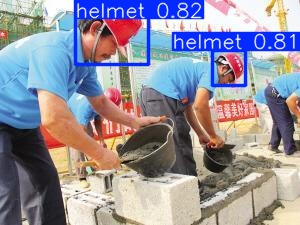

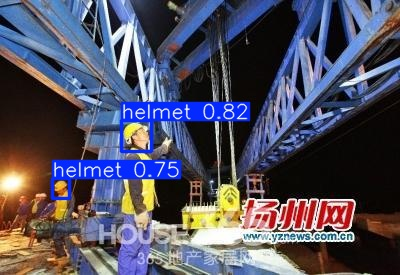

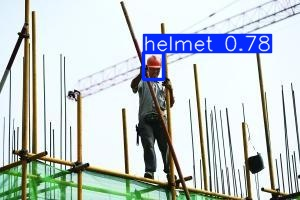

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
#Export model to another format
#model.export(format="onnx")